# Exploratory Data Analysis


## 1. Loading in the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('data/raw/BankChurners.csv')

## 2. Data Exploration

### 2.1 Understand Dataset Structure

In [5]:
# Get shape (rows, columns) of the data
shape = df.shape
shape

(10127, 23)

In [4]:
# Brief look at the data
display(df.head(5))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### Insights:

There may be insufficient rows for training, particularly if deep learning models are used. Extra data  might need to be added. Feature columns do not seem sufficient to answer all of the business questions. Other datasets might have to be used to compensate for it.

In [5]:
# View basic information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

##### Insights:

There are no `null` values. There are many `object` type columns, which are likely to be categorical variables. There was also no explanation for `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` and `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2` in the data source. We should consider dropping these columns.

### 2.2 Explore Feature Patterns

In [ ]:
# Identify feature types
nonnumerical_features = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
features = nonnumerical_features + numerical_features # excluding CLIENTNUM since it is a unique key

In [6]:
# Categorise the columns based on df.info()
nominal_categorical = ['Education_Level'] # Categorical (string categories)
ordinal_categorical = ['Attrition_Flag', 'Gender', 'Marital_Status',
                         'Income_Category', 'Card_Category'] # Categorical (numeric categories)

numerical = ['Customer_Age', 'Dependent_count', 'Month_with_bank',
             'No_of_product', 'Months_Inactive_12_mon', 'Credit_Limit',
             'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
             'Total_Trans_Count', 'Avg_Utilization_Ratio']

categorical = nominal_categorical + ordinal_categorical

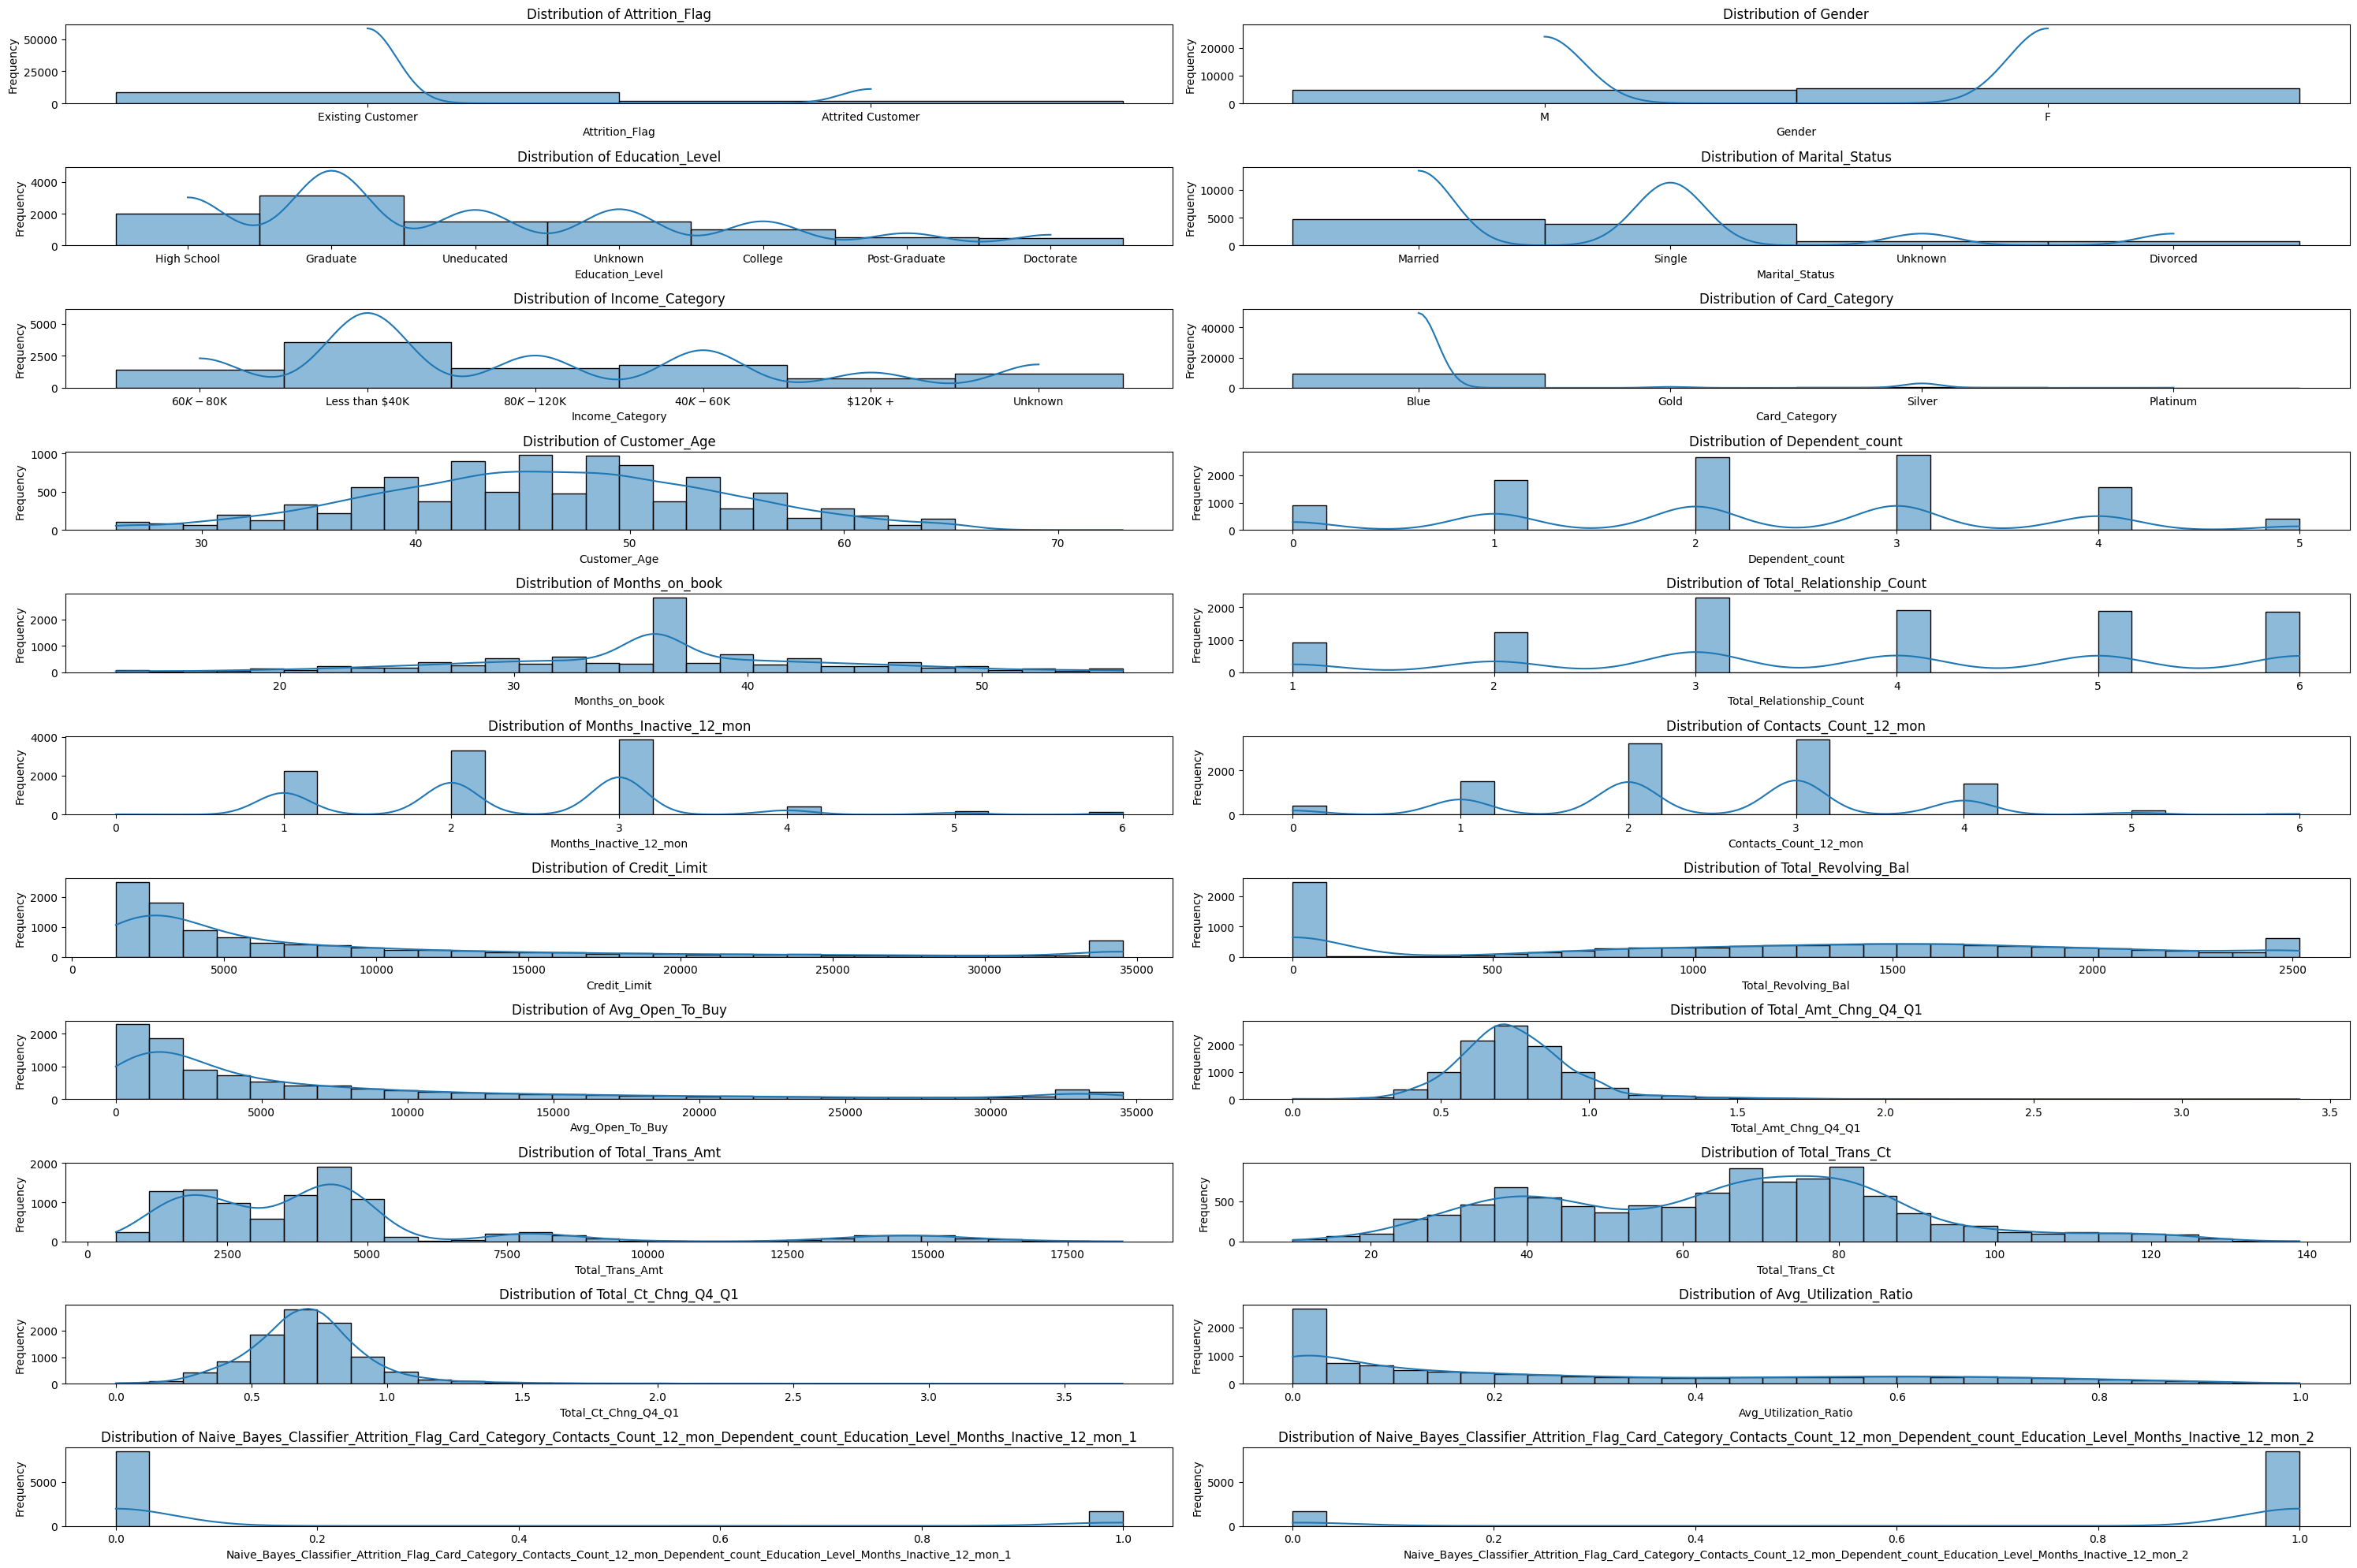

In [10]:
# Explore distributions of all features
plt.figure(figsize=(30, 20))

for i, col in enumerate(features):
    plt.subplot(11, 2, i+1)  # Create subplots for each numerical column
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with KDE for better visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Insights:

Most of the data related to purchases tend to have a long right tail, indicating that there are some high-value clients that the bank must retain at all cost as they generate a lot of revenue.

#### 2.2.1 Non-Numerical Features

In [12]:
# List all the categories in each non-numerical feature
for feature in nonnumerical_features:
    print(feature,  ':', df[feature].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


##### Insights:

While there was not inconsistency in the categorical data, there are many symbols in the `Income` column that can be removed for easier use.

In [22]:
# find missing values
total_row = df.shape[0]

for feature in nonnumerical_features:
    unknown_row = df[df[feature] == 'Unknown'].shape[0]
    unknown_percentage = (unknown_row / total_row) * 100
    print(f"Percentage of rows with 'Unknown' {feature}: {unknown_percentage:.2f}%")

Percentage of rows with 'Unknown' Attrition_Flag: 0.00%
Percentage of rows with 'Unknown' Gender: 0.00%
Percentage of rows with 'Unknown' Education_Level: 15.00%
Percentage of rows with 'Unknown' Marital_Status: 7.40%
Percentage of rows with 'Unknown' Income_Category: 10.98%
Percentage of rows with 'Unknown' Card_Category: 0.00%


##### Insights:

The percentage of rows with `Unknown` values are relatively low and can be safely dropped. Imputation is also possible.

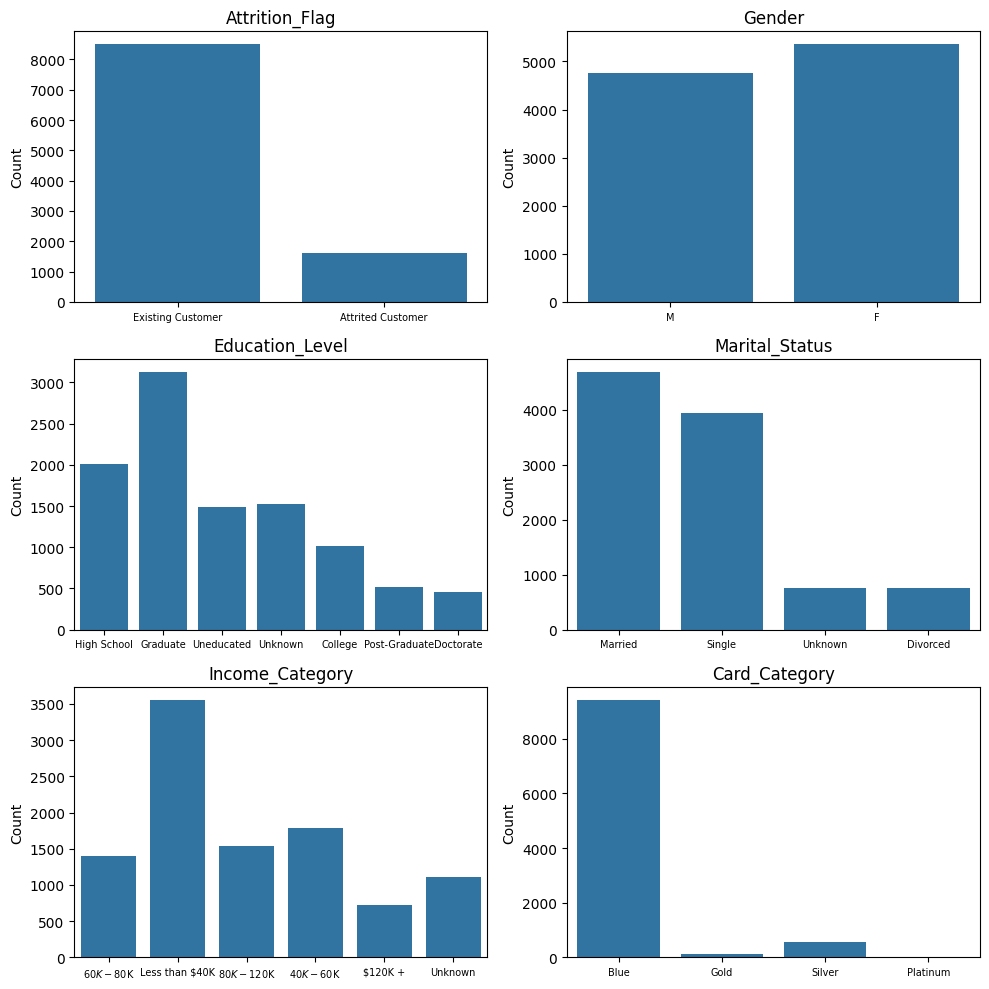

In [13]:
# visualisation for the distributions of non-numerical features only
plt.figure(figsize=(10, 10))

for i, feature in enumerate(nonnumerical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(nonnumerical_features[i])
    plt.xticks(fontsize=7)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64
Gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64
Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64
Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64
Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: proportion, dtype: float64
Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64


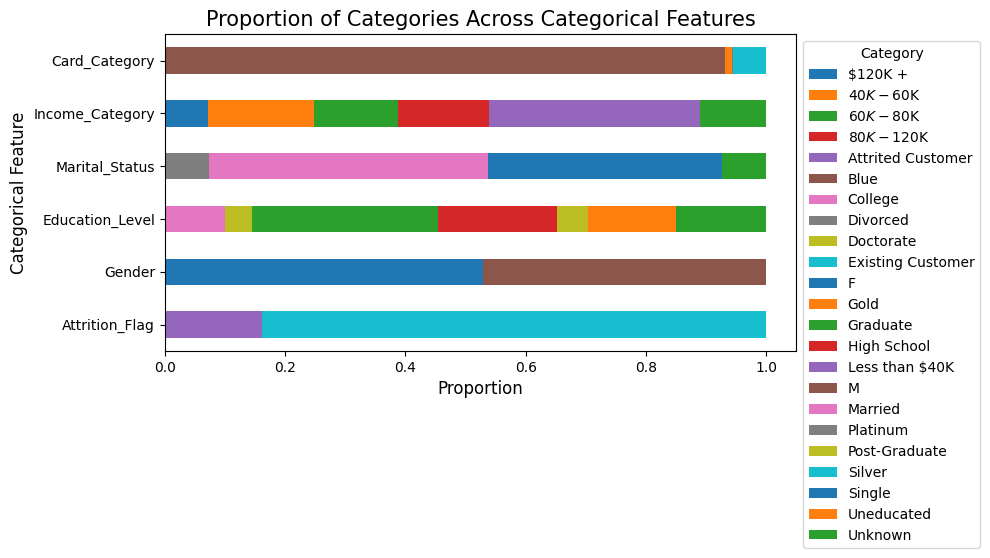

In [14]:
# Display the proportion of each category of the non-numerical columns
proportions = {}
for feature in nonnumerical_features:
    proportions[feature] = df[feature].astype(str).value_counts(normalize=True)
    print(proportions[feature])

# Make a new transposed df to prepare for plotting
proportions_df = pd.DataFrame(proportions).transpose()

proportions_df.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.title('Proportion of Categories Across Categorical Features', fontsize=15)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Categorical Feature', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**Attrition_Flag**: Importantly, there are much more Existing clients than Attritted (roughly 5:1). While this is good for the bank from a business perspective, this imbalance may be an issue during churn modelling, and methods such as undersampling may have to be used to balance the samples.

**Customer_Age**: Most customers range from working age (mid twenties to mid fifties) to retirees (mid fifties and above). Our products will thus have to cater largely to these segments.

**Card_Category**: Most customers possess the lowest tier available, with very few having higher tiers. This may imply a large proportion of our clients are not spending, or are unaware of different card options. Either way, this is something that can be explored further.

In [11]:
# Get churn count
df.groupby('Attrition_Flag').size()

Attrition_Flag
0    1627
1    8500
dtype: int64

##### Insights:

While having less attrited customers are good for the bank, an **imbalance** dataset may cause problems during modelling. This is something we should take note of.

#### 2.2.2 Numerical Features

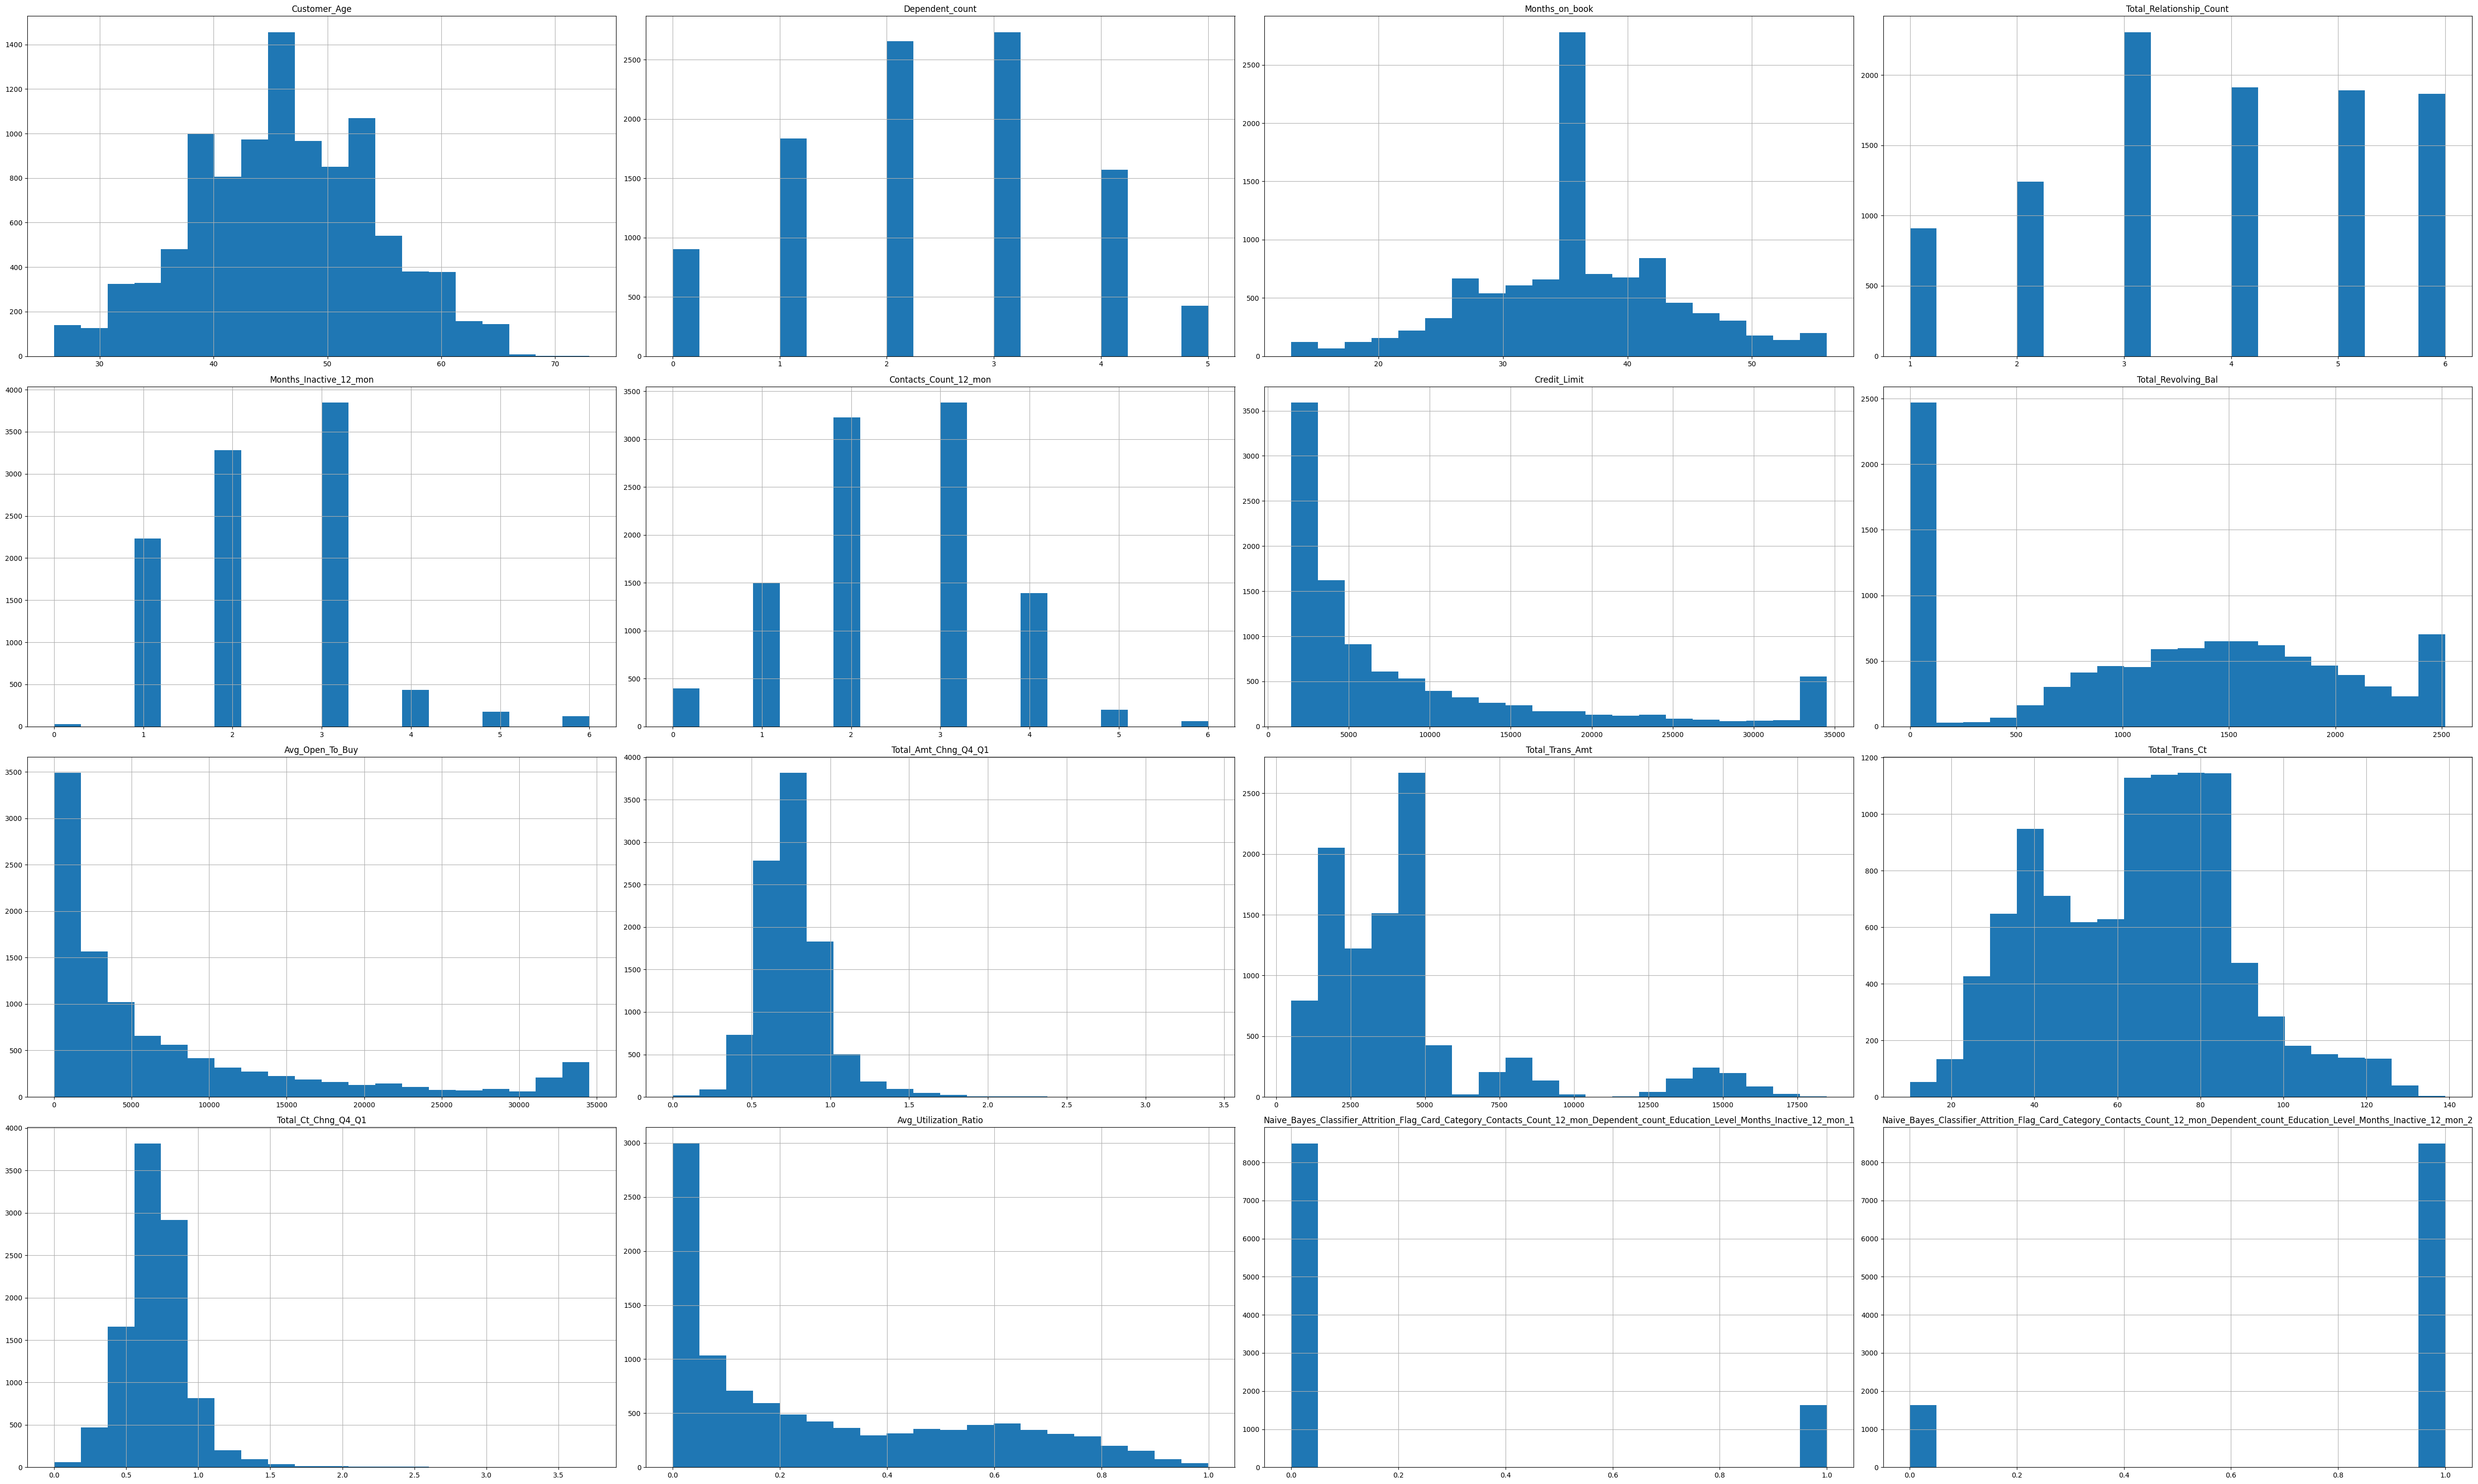

In [18]:
# Visualisation for the distributions of numerical features only
df[numerical_features].hist(bins=20, figsize=(50, 30))
plt.tight_layout()
plt.show()

##### Insights:

`Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy` and `Avg_Utilization_Ratio` have a large amount of **zero values**.
The distributions of `Month_Inactive_12_mon`, `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Amount` and `Avg_Utilization_Ratio` seem to be **skewed to the left**.
The distributions of `Customer_Age`, `Dependent Count`, `Month_with_bank` and `Total_Revolving_Bal`seem to be **symmetrical**.

In [19]:
# Explore the skewness of the distribution of numerical columns
df[numerical_features].skew()

Customer_Age                                                                                                                         -0.033605
Dependent_count                                                                                                                      -0.020826
Months_on_book                                                                                                                       -0.106565
Total_Relationship_Count                                                                                                             -0.162452
Months_Inactive_12_mon                                                                                                                0.633061
Contacts_Count_12_mon                                                                                                                 0.011006
Credit_Limit                                                                                                                          1.666726

In [20]:
# Explore the skewness of the distribution of numerical columns while exluding zero values
df[numerical_features][df[numerical_features] != 0].skew()

Customer_Age                                                                                                                         -0.033605
Dependent_count                                                                                                                       0.236503
Months_on_book                                                                                                                       -0.106565
Total_Relationship_Count                                                                                                             -0.162452
Months_Inactive_12_mon                                                                                                                0.663364
Contacts_Count_12_mon                                                                                                                 0.306998
Credit_Limit                                                                                                                          1.666726

##### Insights:

The skewness in `Total_Revolving_Bal` and `Avg_Utilization_Ratio` is heavily affected by the zero values.

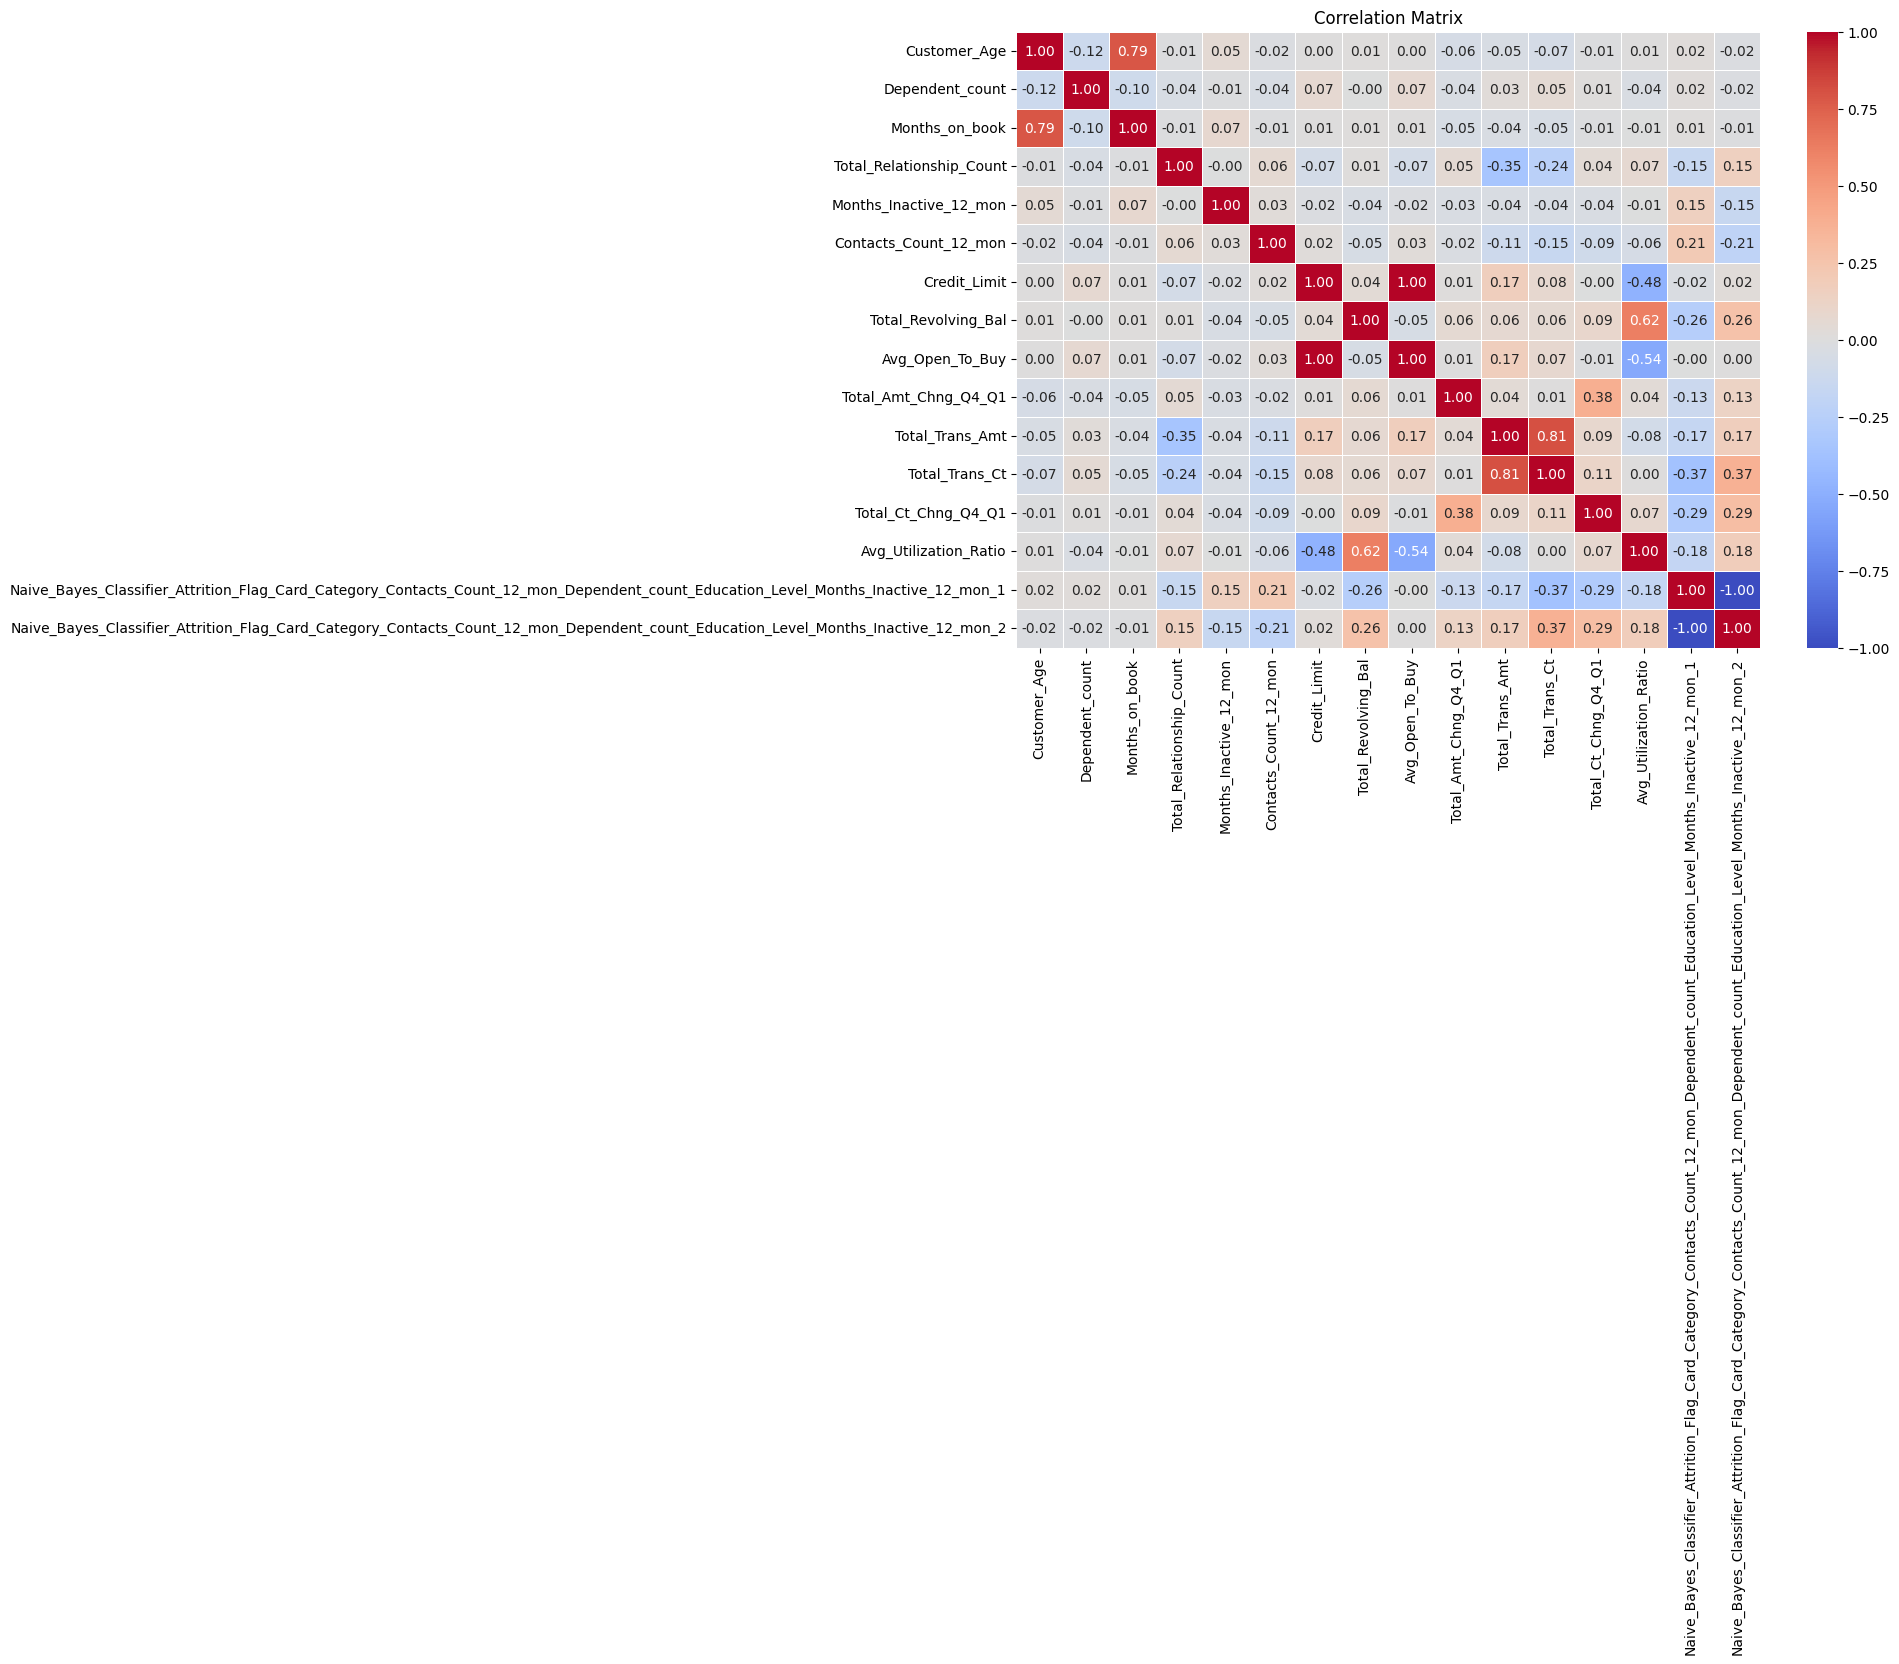

In [21]:
# Generating a heatmap to visualise correlation between numerical features
numerical_df = df[numerical_features].copy()
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Insights:

Only a few pairs of features may be considered high correlation (> 0.6), namely:

- Months_on_book and Customer_Age
- Total_Trans_Ct and Total_Trans_Amount
- Avg_Open_To_Buy and Credit_Limit
- Avg_Utilization_Ratio and Total_Revolving_Bal 

Most of the data had low correlation, which suggests very little relationship between features. Multicollinearity is also not likely in most features.

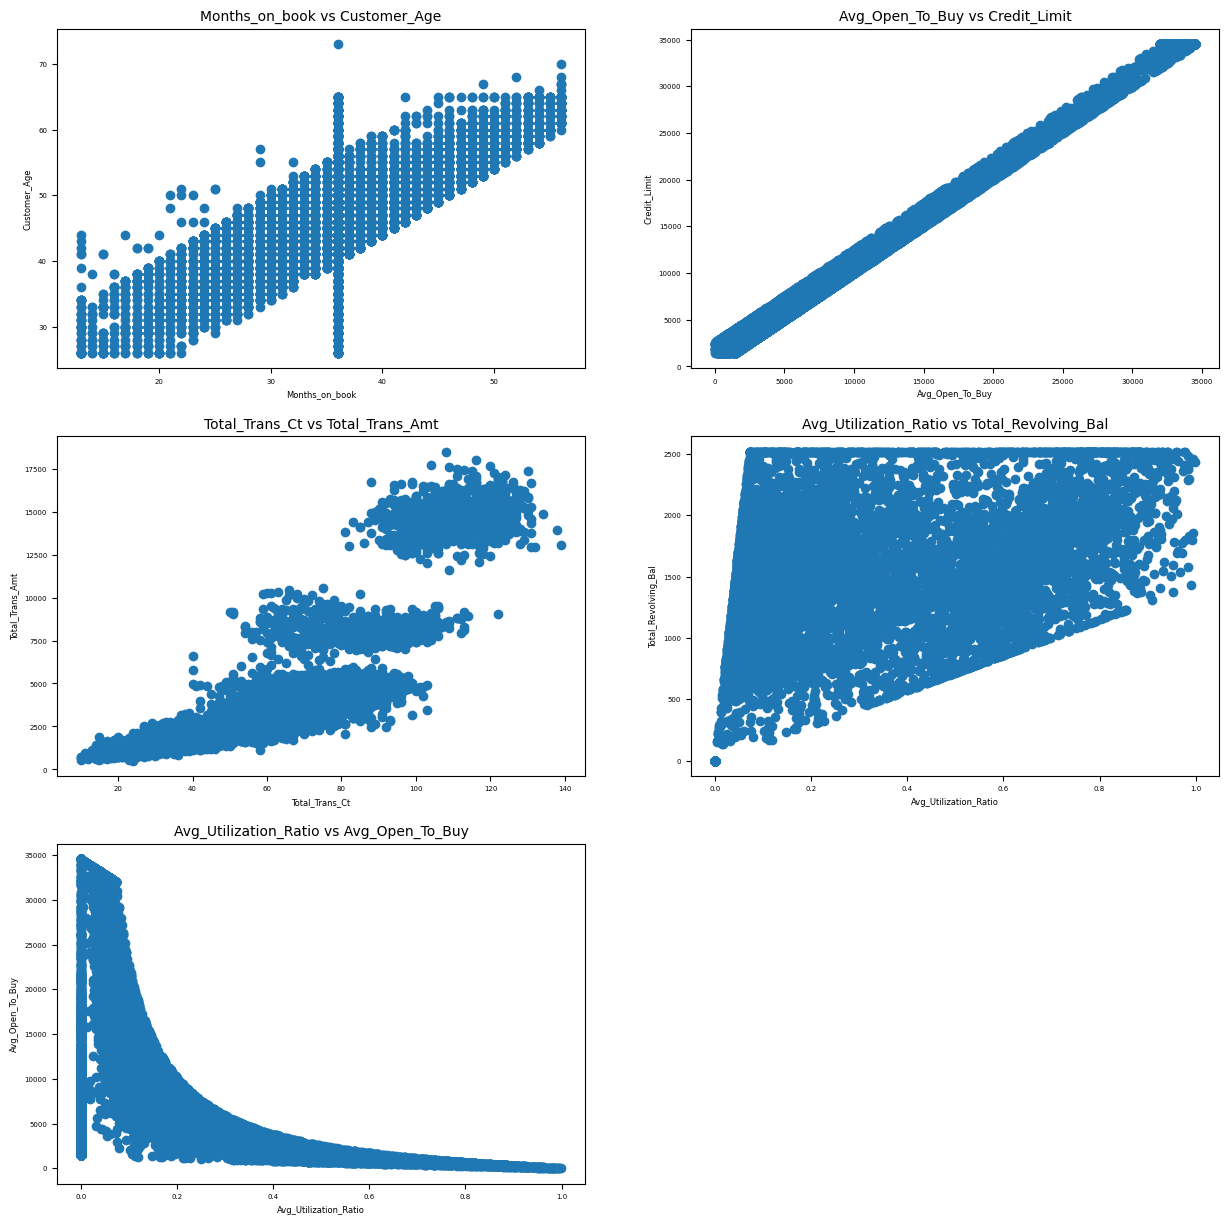

In [26]:
# Scatter plots for correlated numerical features identified in the previous plot
correlated_features = {'Months_on_book': ['Customer_Age'],
                       'Avg_Open_To_Buy': ['Credit_Limit'],
                       'Total_Trans_Count': ['Total_Trans_Amt'],
                       'Avg_Utilization_Ratio': ['Total_Revolving_Bal',
                                                 'Avg_Open_To_Buy']}

fig, axes = plt.subplots(3, 2, figsize=(15,15))

axes[0,0].scatter(x=df['Months_on_book'], y=df['Customer_Age'])
axes[0,0].set_title('Months_on_book vs Customer_Age', fontsize=10)
axes[0,0].set_xlabel('Months_on_book', fontsize=6)
axes[0,0].set_ylabel('Customer_Age', fontsize=6)
axes[0,0].tick_params(axis='both', labelsize=5)

axes[0,1].scatter(x=df['Avg_Open_To_Buy'], y=df['Credit_Limit'])
axes[0,1].set_title('Avg_Open_To_Buy vs Credit_Limit', fontsize=10)
axes[0,1].set_xlabel('Avg_Open_To_Buy', fontsize=6)
axes[0,1].set_ylabel('Credit_Limit', fontsize=6)
axes[0,1].tick_params(axis='both', labelsize=5)

axes[1,0].scatter(x=df['Total_Trans_Ct'], y=df['Total_Trans_Amt'])
axes[1,0].set_title('Total_Trans_Ct vs Total_Trans_Amt', fontsize=10)
axes[1,0].set_xlabel('Total_Trans_Ct', fontsize=6)
axes[1,0].set_ylabel('Total_Trans_Amt', fontsize=6)
axes[1,0].tick_params(axis='both', labelsize=5)

axes[1,1].scatter(x=df['Avg_Utilization_Ratio'], y=df['Total_Revolving_Bal'])
axes[1,1].set_title('Avg_Utilization_Ratio vs Total_Revolving_Bal', fontsize=10)
axes[1,1].set_xlabel('Avg_Utilization_Ratio', fontsize=6)
axes[1,1].set_ylabel('Total_Revolving_Bal', fontsize=6)
axes[1,1].tick_params(axis='both', labelsize=5)

axes[2,0].scatter(x=df['Avg_Utilization_Ratio'], y=df['Avg_Open_To_Buy'])
axes[2,0].set_title('Avg_Utilization_Ratio vs Avg_Open_To_Buy', fontsize=10)
axes[2,0].set_xlabel('Avg_Utilization_Ratio', fontsize=6)
axes[2,0].set_ylabel('Avg_Open_To_Buy', fontsize=6)
axes[2,0].tick_params(axis='both', labelsize=5)

fig.delaxes(axes[2,1]) # delete the redundant subplot

plt.show()

##### Insights:

- Strong **linear** relationship between `Months_on_book` and `Customer_Age` and between `Avg_Open_To_Buy` and `Credit_Limit`
- Strong **inverse** relationship between `Avg_Utilization_ Ratio` and `Avg_Open_To_Buy`